# PR8-2: Classificatiemodellen in Machine Learning.

Hieronder is een voorbeeld uit het hoorcollege hoe we de classificatiemodellen in Machine Learning kunnen toepassen. We gaan een classificatiemodel maken met de Titanic dataset. Waar de volgende stappen in voorkomen:

Hier importeren we alle benodigde libraries en lezen we de data in.

In [149]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Laad de connnectie met de database voor later.
conn = sqlite3.connect('data/go_sales.sqlite')

Eerst gaan we alle data inlezen die nodig zijn voor deze opdracht.

In [150]:
df = pd.read_csv('data/titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Hierna pakken we de data die we echt nodig hebben voor dit experiment.

In [151]:
df = df.loc[:, ['pclass', 'sex', 'age', 'survived']]
df

,pclass,sex,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1304,3,female,14.5000,0
1305,3,female,NaN,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


Met de data die we nodig hebben in hand gaan we nu beginnen aan het one-hot encoden van de data.

In [152]:
df['pclass'] = df['pclass'].astype(str)
df.dtypes

pclass       object
sex          object
age         float64
survived      int64
dtype: object

Hierna pakken we de dummie data die we dan gaan gebruiken voor het trainen van het model.

In [153]:
dummies_dataframe = pd.get_dummies(df.loc[:, ['sex','pclass']])
dummies_dataframe

,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,True,False,True,False,False
1,False,True,True,False,False
2,True,False,True,False,False
3,False,True,True,False,False
4,True,False,True,False,False
...,...,...,...,...,...
1304,True,False,False,False,True
1305,True,False,False,False,True
1306,False,True,False,False,True
1307,False,True,False,False,True


Nu moeten de de dummie data nog toevoegen aan de orginele dataframe.
Dan droppen wij de sex kolom en dan pakken we de rest van de tabel mee.

In [154]:
df = pd.concat([df, dummies_dataframe], axis=1)
df = df.drop(['sex'], axis=1)
df = df.loc[:, ['pclass_1','pclass_2','pclass_3','sex_female','sex_male','age', 'survived']]
df

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,age,survived
0,True,False,False,True,False,29.0000,1
1,True,False,False,False,True,0.9167,1
2,True,False,False,True,False,2.0000,0
3,True,False,False,False,True,30.0000,0
4,True,False,False,True,False,25.0000,0
...,...,...,...,...,...,...,...
1304,False,False,True,True,False,14.5000,0
1305,False,False,True,True,False,NaN,0
1306,False,False,True,False,True,26.5000,0
1307,False,False,True,False,True,27.0000,0


Hier gaan we de data opsplitsen in een train en test set. Dus verticaal opsplitsen in x en y.

In [155]:
x = df.drop('survived', axis=1)
y = df['survived']
x

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,age
0,True,False,False,True,False,29.0000
1,True,False,False,False,True,0.9167
2,True,False,False,True,False,2.0000
3,True,False,False,False,True,30.0000
4,True,False,False,True,False,25.0000
...,...,...,...,...,...,...
1304,False,False,True,True,False,14.5000
1305,False,False,True,True,False,NaN
1306,False,False,True,False,True,26.5000
1307,False,False,True,False,True,27.0000


Nu gaan we de data splitsen in een train en test set. Dus horizontaal opsplitsen in x en y.

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

### Met max_depth=2
Nu gaan we de decision tree classifier en daarna opbouwen en uiteindelijk evalueren.

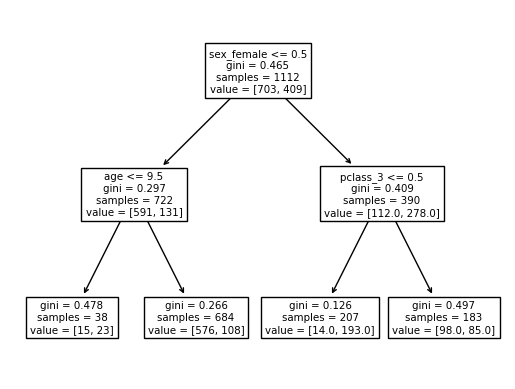

In [157]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

Daarna gaan we de data voorspellen en de confusion matrix maken.

In [158]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns={0: 'Predicted Survived'})
model_results_frame = pd.concat([y_test.reset_index()['survived'], predicted_df], axis=1)
model_results_frame

,survived,Predicted Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
192,0,0
193,1,0
194,0,0
195,0,0


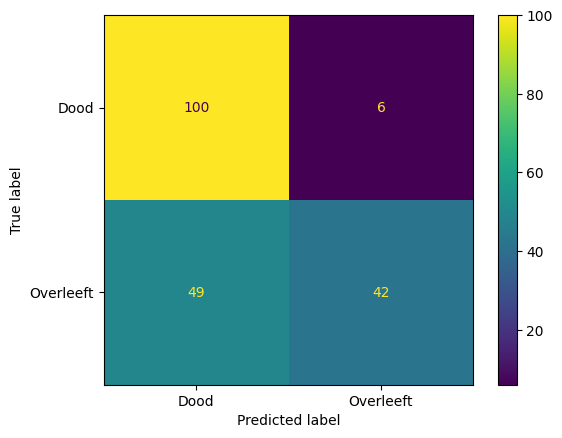

In [159]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['survived'], model_results_frame['Predicted Survived'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['Dood', 'Overleeft'])

cm_display.plot()
plt.show()

Nu moeten we nog de score berekenen van de classifier.

In [160]:
metrics.accuracy_score(model_results_frame['survived'], model_results_frame['Predicted Survived'])

0.7208121827411168

### Geen max depth
Maar omdat we zojuist een decision tree classifier van een max depth van 2 hebben gemaakt, gaan we nu een classifier maken met geen max depth.

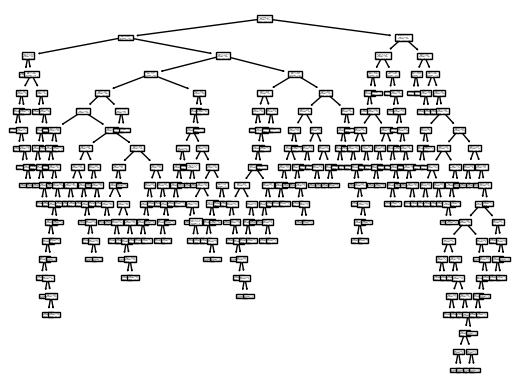

In [161]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

In [162]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns={0: 'Predicted Survived'})
model_results_frame = pd.concat([y_test.reset_index()['survived'], predicted_df], axis=1)
model_results_frame

,survived,Predicted Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
192,0,0
193,1,0
194,0,0
195,0,0


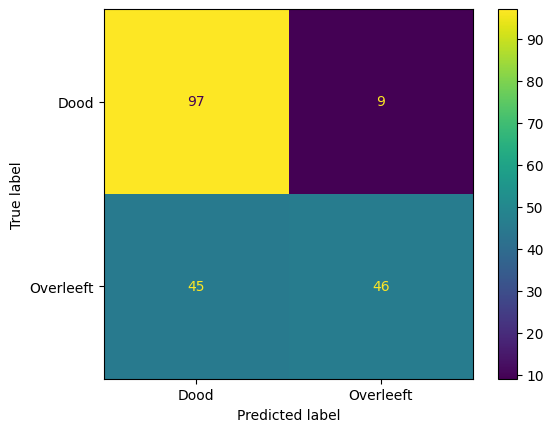

In [163]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['survived'], model_results_frame['Predicted Survived'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['Dood', 'Overleeft'])

cm_display.plot()
plt.show()

In [164]:
metrics.accuracy_score(model_results_frame['survived'], model_results_frame['Predicted Survived'])

0.7258883248730964

Great Outdoors wil graag weten wat de retourredenen gaan zijn op basis van een set onafhankelijke variabelen. Daarom wil zij een model trainen op basis van reeds bekende data, zodat deze volgend jaar in gebruik kan worden genomen. Let op: de retourreden kan ook "n.v.t." zijn, niet elke order wordt namelijk geretourneerd; je zult dit moeten aanpakken door een join tussen "returned_item" en "order_details". Je doet dus het volgende met de reeds bekende data:
- Bedenk met welke onafhankelijke variabelen dit naar verwachting het beste voorspeld kan worden en zet deze samen met de afhankelijke variabele in één DataFrame.
- Pas waar nodig Dummy Encoding toe.
- Snijd dit DataFrame horizontaal en verticaal op de juiste manier.
- Train het classificatiemodel.
- Evalueer de performance van je getrainde classificatiemodel a.d.h.v. een confusion matrix.

Dit is de opdracht die we gaan uitvoeren. In dit geval gaan we de retourreden voorspellen door gebruik te maken van producten type en de prijs van het product.

In [165]:
order_details = pd.read_sql_query('SELECT * FROM order_details', conn)
returned_item = pd.read_sql_query('SELECT * FROM returned_item', conn)
returned_reason = pd.read_sql_query('SELECT * FROM return_reason', conn)
order_details = order_details.drop(['TRIAL879'], axis=1)
returned_item = returned_item.drop(['TRIAL888'], axis=1)
returned_reason = returned_reason.drop(['TRIAL888'], axis=1)

Tabellen gaan we nu mergen, hiervoor heb ik laatst een functie voor gemaakt om alle tabellen te mergen en kijken we alleen of de data wel van toepassing is in de tabel:

In [166]:
merged_table = pd.merge(order_details, returned_item, on='ORDER_DETAIL_CODE', how='left')
merged_table = pd.merge(merged_table, returned_reason, on='RETURN_REASON_CODE', how='left')
merged_table.fillna('N.V.T.', inplace=True)
filtered_table = merged_table.query('RETURN_CODE != "N.V.T."')
filtered_table

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,RETURN_CODE,RETURN_DATE,RETURN_REASON_CODE,RETURN_QUANTITY,RETURN_DESCRIPTION_EN
143,100146,8465,15,16,504.54,756.82,593.5,1975,9-8-2021 18:45:17,4,16,Wrong product shipped
146,100149,9116,16,64,1.02,2.05,2.05,1976,6-7-2021 13:34:59,5,64,Unsatisfactory product
196,100199,9113,30,22,6.78,13.57,13.57,1979,6-7-2021 07:19:36,4,22,Wrong product shipped
247,100250,9254,43,52,126.51,189.77,189.77,2298,14-12-2021 11:28:50,1,6,Defective product
634,100641,9269,111,6,81.87,180.13,180.13,2301,19-12-2021 04:10:53,4,6,Wrong product shipped
...,...,...,...,...,...,...,...,...,...,...,...,...
42809,99739,9250,15,16,554.59,831.88,626.94,1974,9-11-2020 13:32:27,1,2,Defective product
42816,99746,8444,17,34,64.36,90.09,90.09,1977,18-8-2020 19:48:51,1,2,Defective product
42876,99807,8440,33,70,19.62,29.44,29.44,1980,22-11-2020 13:33:29,1,6,Defective product
42879,99810,9251,34,54,32.02,51.24,51.24,1981,17-10-2020 19:48:21,3,54,Wrong product ordered


Nu moeten we nog wat data converteren naar string data inplaats van date.

In [167]:
filtered_table['RETURN_DATE'] = pd.to_datetime(filtered_table['RETURN_DATE'], format="%d-%m-%Y %H:%M:%S")
filtered_table['YEAR'] = filtered_table['RETURN_DATE'].dt.year.astype(str)
filtered_table['MONTH'] = filtered_table['RETURN_DATE'].dt.month.astype(str)
filtered_table

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,RETURN_CODE,RETURN_DATE,RETURN_REASON_CODE,RETURN_QUANTITY,RETURN_DESCRIPTION_EN,YEAR,MONTH
143,100146,8465,15,16,504.54,756.82,593.5,1975,2021-08-09 18:45:17,4,16,Wrong product shipped,2021,8
146,100149,9116,16,64,1.02,2.05,2.05,1976,2021-07-06 13:34:59,5,64,Unsatisfactory product,2021,7
196,100199,9113,30,22,6.78,13.57,13.57,1979,2021-07-06 07:19:36,4,22,Wrong product shipped,2021,7
247,100250,9254,43,52,126.51,189.77,189.77,2298,2021-12-14 11:28:50,1,6,Defective product,2021,12
634,100641,9269,111,6,81.87,180.13,180.13,2301,2021-12-19 04:10:53,4,6,Wrong product shipped,2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42809,99739,9250,15,16,554.59,831.88,626.94,1974,2020-11-09 13:32:27,1,2,Defective product,2020,11
42816,99746,8444,17,34,64.36,90.09,90.09,1977,2020-08-18 19:48:51,1,2,Defective product,2020,8
42876,99807,8440,33,70,19.62,29.44,29.44,1980,2020-11-22 13:33:29,1,6,Defective product,2020,11
42879,99810,9251,34,54,32.02,51.24,51.24,1981,2020-10-17 19:48:21,3,54,Wrong product ordered,2020,10


In [168]:
selected_columns = filtered_table[['PRODUCT_NUMBER', 'UNIT_COST', 'UNIT_PRICE', 'QUANTITY', 'YEAR', 'MONTH', 'RETURN_CODE', 'RETURN_REASON_CODE', 'RETURN_DESCRIPTION_EN']]
selected_columns

,PRODUCT_NUMBER,UNIT_COST,UNIT_PRICE,QUANTITY,YEAR,MONTH,RETURN_CODE,RETURN_REASON_CODE,RETURN_DESCRIPTION_EN
143,15,504.54,756.82,16,2021,8,1975,4,Wrong product shipped
146,16,1.02,2.05,64,2021,7,1976,5,Unsatisfactory product
196,30,6.78,13.57,22,2021,7,1979,4,Wrong product shipped
247,43,126.51,189.77,52,2021,12,2298,1,Defective product
634,111,81.87,180.13,6,2021,12,2301,4,Wrong product shipped
...,...,...,...,...,...,...,...,...,...
42809,15,554.59,831.88,16,2020,11,1974,1,Defective product
42816,17,64.36,90.09,34,2020,8,1977,1,Defective product
42876,33,19.62,29.44,70,2020,11,1980,1,Defective product
42879,34,32.02,51.24,54,2020,10,1981,3,Wrong product ordered


In [169]:
# We moeten controleren of er kolommen zijn die categorische variabelen bevatten die moeten worden omgezet naar dummyvariabelen.
# Laten we eerst controleren welke kolommen categorisch zijn en hoeveel unieke waarden ze bevatten.
for column in selected_columns.columns:
    if selected_columns[column].dtype == 'object':
        print(f"{column}: {selected_columns[column].nunique()} unieke waarden")

# In dit geval lijkt 'PRODUCT_NUMBER', 'YEAR', 'MONTH' en 'RETURN_CODE' categorische variabelen te zijn.
# We passen Dummy Encoding toe op deze kolommen.
dummies_dataframe = pd.get_dummies(selected_columns, columns=['PRODUCT_NUMBER', 'RETURN_REASON_CODE'])

df = pd.concat([selected_columns, dummies_dataframe], axis=1)

PRODUCT_NUMBER: 112 unieke waarden
UNIT_COST: 231 unieke waarden
UNIT_PRICE: 232 unieke waarden
YEAR: 4 unieke waarden
MONTH: 12 unieke waarden
RETURN_CODE: 706 unieke waarden
RETURN_REASON_CODE: 5 unieke waarden
RETURN_DESCRIPTION_EN: 5 unieke waarden


In [170]:
x = df.drop('RETURN_REASON_CODE', axis=1) # Onafhankelijke variabelen
y = df['RETURN_REASON_CODE'] # Afhankelijke variabele

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

In [ ]:
predicted_df = pd.DataFrame(dtree.predict(x_test))
predicted_df = predicted_df.rename(columns={0: 'Predicted Return Reason Code'})

model_results_frame = pd.concat([y_test.reset_index()['RETURN_REASON_CODE'], predicted_df], axis=1)
model_results_frame

,RETURN_DESCRIPTION_EN,Predicted Return Reason
0,Defective product,Defective product
1,Defective product,Defective product
2,Defective product,Defective product
3,Defective product,Defective product
4,Defective product,Defective product
...,...,...
101,Incomplete product,Incomplete product
102,Wrong product shipped,Wrong product ordered
103,Defective product,Defective product
104,Unsatisfactory product,Unsatisfactory product


In [ ]:
confusion_matrix = metrics.confusion_matrix(model_results_frame['RETURN_REASON_CODE'], model_results_frame['Predicted Return Reason Code'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=selected_columns['RETURN_REASON_CODE'].unique())

cm_display.plot()
plt.show()